# TSNE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

def generate_x(df, column):
  return TSNE(n_components=2).fit_transform(np.array(df[column].to_list()))

def plot_tsne(X_embedded, df):
  df1 = pd.DataFrame(X_embedded)
  df1['Class'] = df['node_type'].to_list()

  g = sns.scatterplot(x=0,y=1,data=df1, hue="Class", legend=True, s=150)
  g.set(xlabel=None)
  g.set(ylabel=None)
  g.figure.set_size_inches(15, 10)
  fig = g.get_figure()
  fig.savefig("tsne.pdf") 

In [ ]:
G_original, G_o_regularized = generate_original_graph(df_int, df_movies)
df_original = pd.DataFrame(index = G_o_regularized)

df_original['node_type'] = len(df_original) * ['']

embs_ori = []
for node in G_o_regularized.nodes():
  df_original.loc[node]['node_type'] = G_o_regularized.nodes[node]['type']
  embs_ori.append(G_o_regularized.nodes[node]['f'])

df_original['bert-m-u-o'] = embs_ori

In [ ]:
tf.random.set_seed(81)
stellargraph.random.set_seed(81)

patience= 50
n_neuron= [64, 32]
activation= ['tanh', 'tanh']
dropout= 0.4
lr= 0.001

model = gcn_experimental_loop(G_original, EXPERIMENTAL_SEED, P_FRAC, epoch, patience, n_neuron, activation, dropout, lr)

embedding_generator = keras.Model(inputs=model.input, outputs=model.layers[layer_output_emb[len(n_neuron)]].output)

gen = FullBatchLinkGenerator(G_original, method="gcn")
flow = gen.flow(G_o_regularized.edges, [1] * len((G_o_regularized.edges)))

embeddings = embedding_generator.predict(flow)

df_original['emb_gnn_ori'] = list(embeddings[0])

In [ ]:
G_enriched, G_e_regularized = generate_graph_enriched(df_int, df_movies)

df_gnn = pd.DataFrame(index = G_e_regularized)

df_gnn['node_type'] = len(df_gnn) * ['']

embs = []
for node in G_e_regularized.nodes():
  df_gnn.loc[node]['node_type'] = G_e_regularized.nodes[node]['type']
  embs.append(G_e_regularized.nodes[node]['f'])

df_gnn['BERT_reg'] = embs

In [ ]:
tf.random.set_seed(81)
stellargraph.random.set_seed(81)

epoch =200
patience= 50
n_neuron= [64, 32]
activation= ['tanh', 'tanh']
dropout= 0.3
lr= 0.001

epoch =100
patience= 10
n_neuron= [32]
activation= ['tanh']
dropout= 0.35
lr= 0.01

model = gcn_experimental_loop(G_enriched, EXPERIMENTAL_SEED, P_FRAC, epoch, patience, n_neuron, activation, dropout, lr)

embedding_generator = keras.Model(inputs=model.input, outputs=model.layers[layer_output_emb[len(n_neuron)]].output)

gen = FullBatchLinkGenerator(G_enriched, method="gcn")
flow = gen.flow(G_e_regularized.edges, [1] * len((G_e_regularized.edges)))

embeddings = embedding_generator.predict(flow)

df_gnn['emb_gnn_eri'] = list(embeddings[0])

## BERT-movie

In [ ]:
x_bert_ori_m = generate_x(df_original[df_original['node_type'] == 'item'], 'bert-m-u-o')

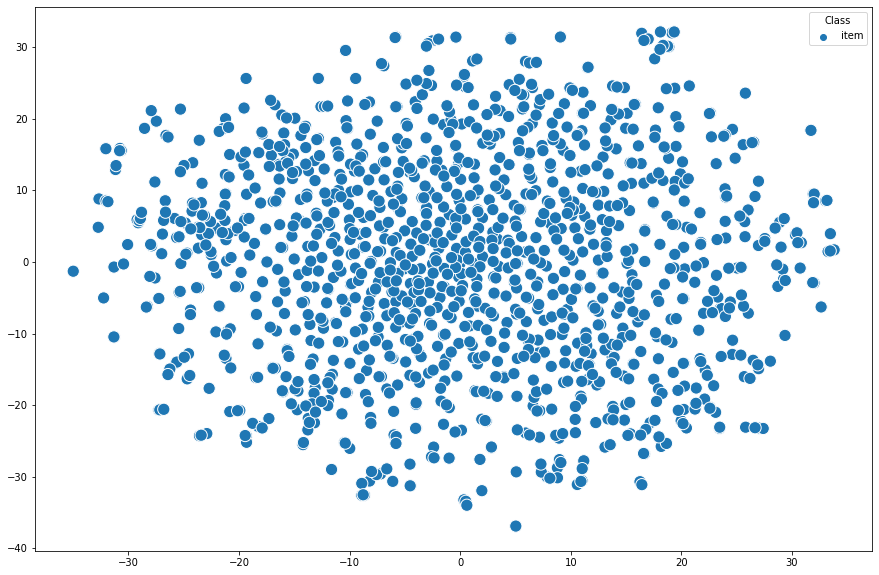

In [ ]:
plot_tsne(x_bert_ori_m, df_original[df_original['node_type'] == 'item'])

## BERT-movie-user-original


In [ ]:
x_bert_ori = generate_x(df_original, 'bert-m-u-o')

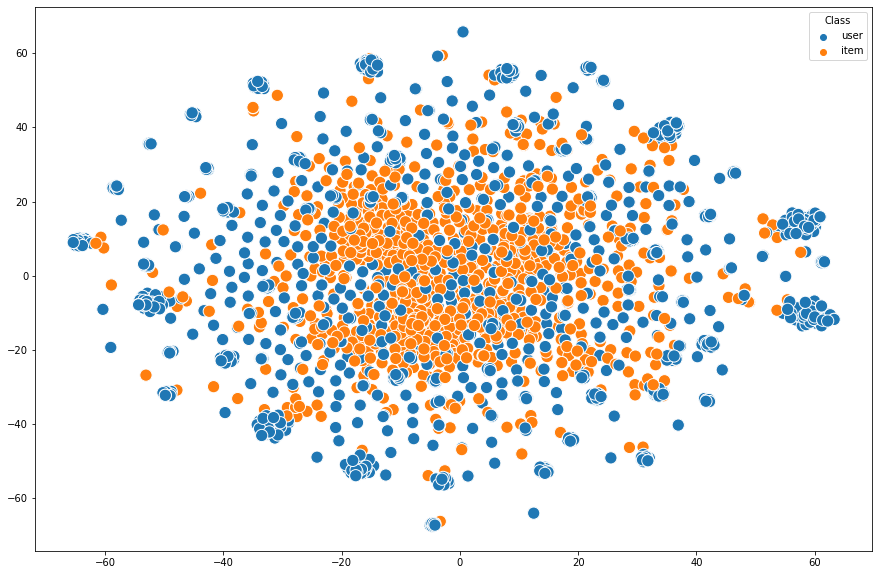

In [ ]:
 plot_tsne(x_bert_ori , df_original)

## BERT-movie-user-enriched


In [ ]:
x = generate_x(df_gnn[(df_gnn['node_type'] == 'item') | (df_gnn['node_type'] == 'user')], 'BERT_reg')

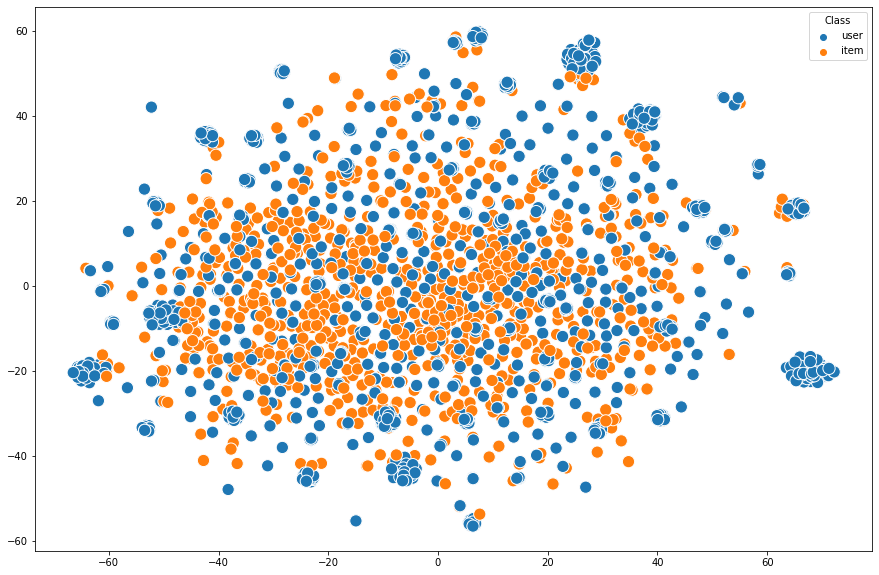

In [ ]:
 plot_tsne(x, df_gnn[(df_gnn['node_type'] == 'item') | (df_gnn['node_type'] == 'user')])

## GNN-original

In [ ]:
x_ori = generate_x(df_original, 'emb_gnn_ori')

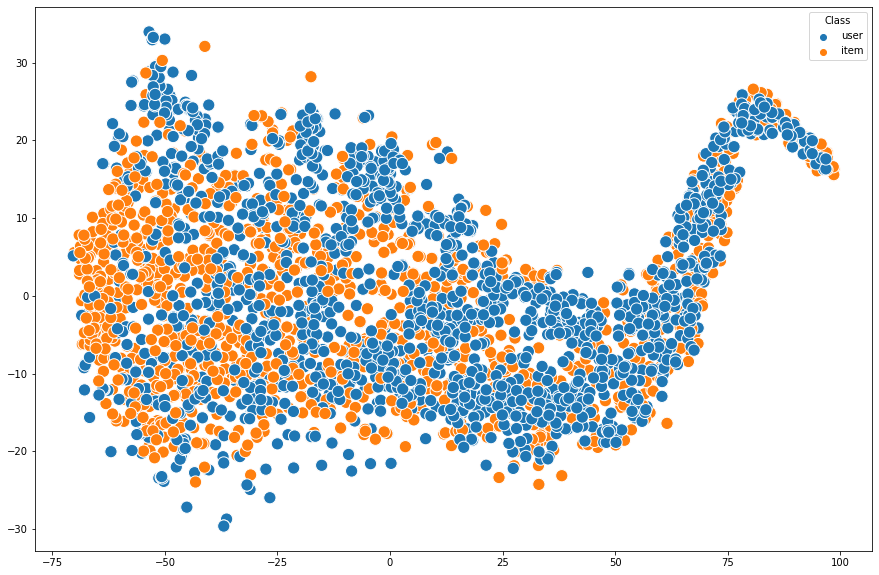

In [ ]:
plot_tsne(x_ori, df_original)

## GNN-enriched - best f1


In [ ]:
x_gnn = generate_x(df_gnn[(df_gnn['node_type'] == 'item') | (df_gnn['node_type'] == 'user')], 'emb_gnn_eri')

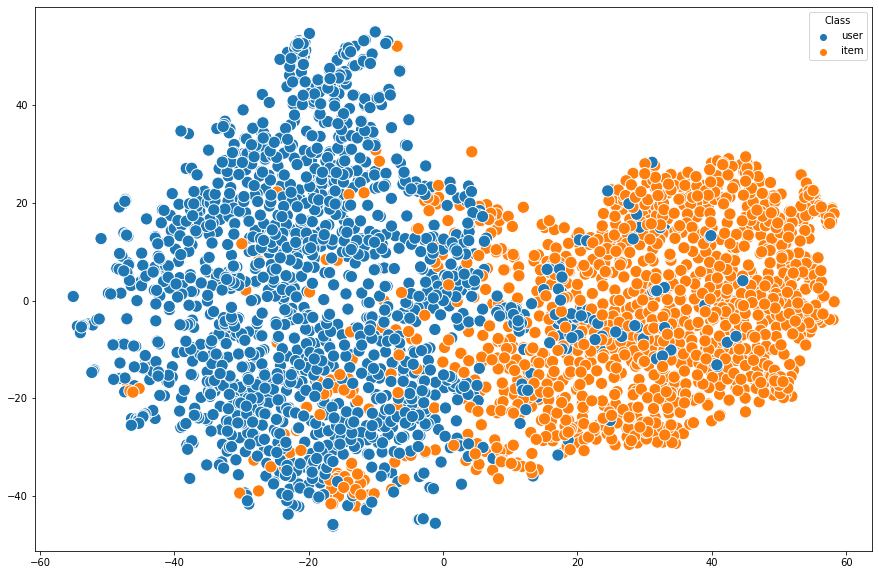

In [ ]:
 plot_tsne(x_gnn, df_gnn[(df_gnn['node_type'] == 'item') | (df_gnn['node_type'] == 'user')])